<a href="https://colab.research.google.com/github/sakshi228/Iris_classification/blob/main/Iris_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras

In [2]:
df = pd.read_csv('/content/Iris.csv')
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df['Species'].value_counts()


Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [7]:
species_name = le.classes_
print(species_name)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [8]:
X = df.drop(columns=['Id', 'Species'])
y = df['Species']
X.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [9]:
print(y[:5])

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64


In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=69)

In [11]:
x_train.shape

(105, 4)

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
print(x_train[:1])
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
print(x_train[:1])


    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
57            4.9           2.4            3.3           1.0
[[-1.14630942 -1.44374444 -0.25650655 -0.258263  ]]


In [13]:
y_train = keras.utils.to_categorical(y_train, num_classes=3)
print(y_train[:5])

[[0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [14]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [15]:
model = Sequential()
model.add(Dense(units=32, activation='relu', input_shape=(x_train.shape[-1], )))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=3, activation='softmax'))

In [16]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                160       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 1315 (5.14 KB)
Trainable params: 1315 (5.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
model.fit(x_train, y_train, epochs=100, verbose=2)

Epoch 1/100
4/4 - 1s - loss: 1.2258 - accuracy: 0.2190 - 904ms/epoch - 226ms/step
Epoch 2/100
4/4 - 0s - loss: 1.1396 - accuracy: 0.2571 - 14ms/epoch - 3ms/step
Epoch 3/100
4/4 - 0s - loss: 1.1107 - accuracy: 0.2762 - 13ms/epoch - 3ms/step
Epoch 4/100
4/4 - 0s - loss: 1.0247 - accuracy: 0.4095 - 12ms/epoch - 3ms/step
Epoch 5/100
4/4 - 0s - loss: 0.9739 - accuracy: 0.5048 - 13ms/epoch - 3ms/step
Epoch 6/100
4/4 - 0s - loss: 0.9508 - accuracy: 0.5333 - 12ms/epoch - 3ms/step
Epoch 7/100
4/4 - 0s - loss: 0.9318 - accuracy: 0.5714 - 12ms/epoch - 3ms/step
Epoch 8/100
4/4 - 0s - loss: 0.9157 - accuracy: 0.5619 - 15ms/epoch - 4ms/step
Epoch 9/100
4/4 - 0s - loss: 0.8880 - accuracy: 0.5810 - 16ms/epoch - 4ms/step
Epoch 10/100
4/4 - 0s - loss: 0.8420 - accuracy: 0.6381 - 12ms/epoch - 3ms/step
Epoch 11/100
4/4 - 0s - loss: 0.8315 - accuracy: 0.6476 - 13ms/epoch - 3ms/step
Epoch 12/100
4/4 - 0s - loss: 0.8062 - accuracy: 0.7524 - 12ms/epoch - 3ms/step
Epoch 13/100
4/4 - 0s - loss: 0.7336 - accurac

In [18]:
prediction = model.predict(x_test)
print(prediction[:5])

2/2 [==============================] - 0s 5ms/step
[[9.9956304e-01 4.3607660e-04 7.9018554e-07]
 [8.1741232e-03 9.1420817e-01 7.7617660e-02]
 [9.9829221e-01 1.7010900e-03 6.6807265e-06]
 [2.0436804e-04 2.4262832e-02 9.7553283e-01]
 [9.9824291e-01 1.7489267e-03 8.0619157e-06]]


In [19]:
prediction = np.argmax(prediction, axis=-1)
print(prediction[:5])

[0 1 0 2 0]


In [20]:
print(y_test[:5])

4      0
58     1
20     0
114    2
31     0
Name: Species, dtype: int64


In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(accuracy_score(y_test, prediction))

0.9777777777777777


In [22]:
cm = confusion_matrix(y_test, prediction)
print(cm)

[[16  0  0]
 [ 0 12  0]
 [ 0  1 16]]


Text(50.72222222222221, 0.5, 'actual')

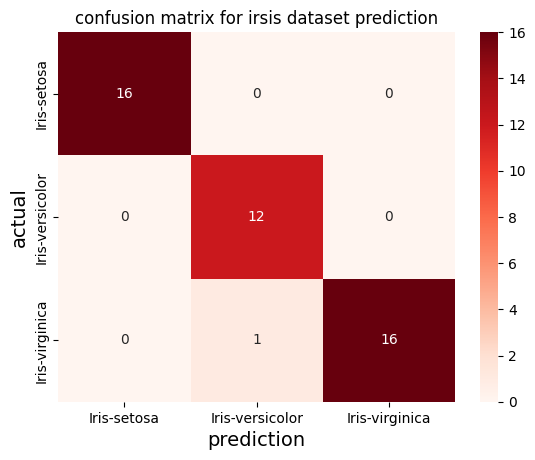

In [23]:
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=species_name, yticklabels=species_name)
ax.set_title('confusion matrix for irsis dataset prediction')
ax.set_xlabel('prediction', fontsize=14)
ax.set_ylabel('actual', fontsize=14)


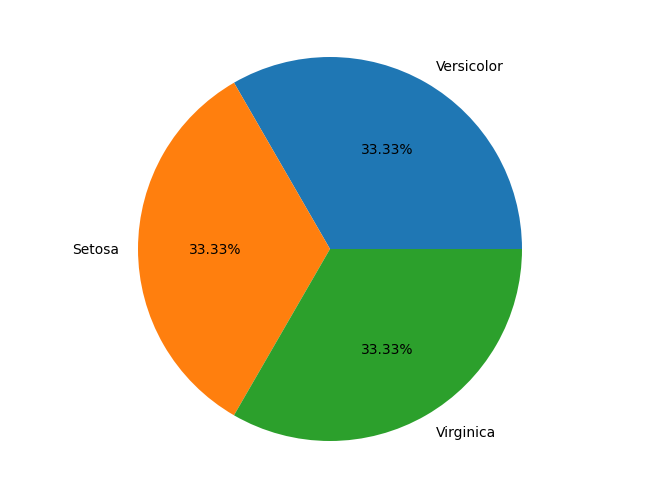

In [24]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
l = ['Versicolor', 'Setosa', 'Virginica']
s = [50,50,50]
ax.pie(s, labels = l,autopct='%1.2f%%')
plt.show()


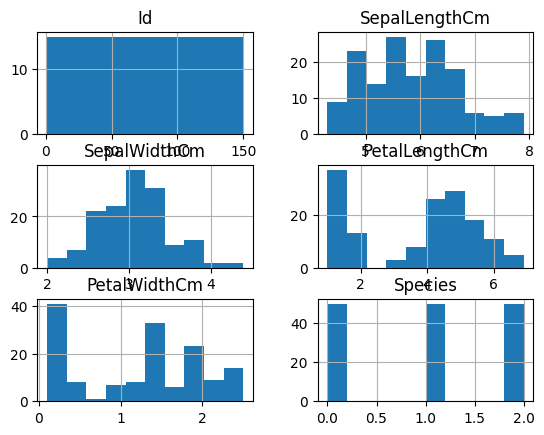

In [25]:
df.hist()
plt.show()


array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>]], dtype=object)

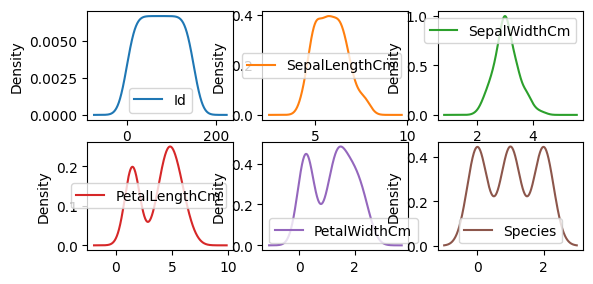

In [26]:
df.plot(kind ='density',subplots = True, layout =(3,3),sharex = False)